### Μηχανική Μάθηση
#### 2η ατομική εργασία
ΣΗΜΜΥ- ΕΜΠ - 7ο εξάμηνο -Ακ. Έτος 2023-24



# ⚠️
`Επισημαίνεται ότι απαγορεύεται η ανάρτηση των λύσεων των εργαστηριακών ασκήσεων στο github, ή σε άλλες ιστοσελίδες. Η σχεδίαση και το περιεχόμενο των εργαστηριακών projects αποτελούν αντικείμενο πνευματικής ιδιοκτησίας της διδακτικής ομάδας του μαθήματος.`

### Εισαγωγή
Στην άσκηση αυτή θα χρησιμοποιήσετε τη μέθοδο συσταδοποίησης k-Μeans, καθώς και τη μέθοδο μείωσης διαστατικότητας PCA σε υπερφασματική εικόνα.

Ονοματεπώνυμο φοιτητή:

Α.Μ.:

### 1. Φόρτωση υπερφασματικής εικόνας

Κατεβάστε την υπερφασματική εικόνα `indian_pines_corrected.npy` και τις αντίστοιχες επισημειώσεις `indian_pines_gt.npy` από το Google Drive:
https://drive.google.com/drive/folders/15hbGoLga9n4K6wxRP6qsLV1P-7Nj-Vht?usp=sharing

1.α. Φορτώστε την εικόνα με χρήση της συνάρτησης numpy.load

In [1]:
import numpy as np

# Paths to the files
image_path = './indian_pines_corrected.npy'
gt_path = './indian_pines_gt.npy'

# Load the hyperspectral image and ground truth annotations
image = np.load(image_path)
ground_truth_annotations = np.load(gt_path)

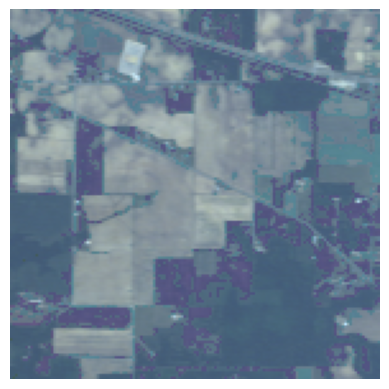

In [2]:
import matplotlib.pyplot as plt

R_band = image[:, :, 29]   
G_band = image[:, :, 19]  
B_band = image[:, :, 9]

# Stack the bands to create a 3-channel image
RGB_image = np.stack((R_band, G_band, B_band), axis=2)

# Normalize the image to the range [0, 1] for display purposes
RGB_image = RGB_image / np.max(RGB_image)

# Display the image
plt.imshow(RGB_image)
plt.axis('off')  
plt.show()

1.β. Χρησιμοποιώντας την ίδια συνάρτηση, φορτώστε τις αντίστοιχες επισημειώσεις ανά pixel εικόνας `indian_pines_gt.npy`. Οι επισημειώσεις αυτές αντιστοιχίζουν κάθε pixel της υπερφασματικής εικόνας σε ένα τύπο από 17 διαφορετικές κατηγορίες (η επισημείωση 0 αντιστοιχεί σε "Undefined"):

```python
classes = [
    "Undefined",
    "Alfalfa",
    "Corn-notill",
    "Corn-mintill",
    "Corn",
    "Grass-pasture",
    "Grass-trees",
    "Grass-pasture-mowed",
    "Hay-windrowed",
    "Oats",
    "Soybean-notill",
    "Soybean-mintill",
    "Soybean-clean",
    "Wheat",
    "Woods",
    "Buildings-Grass-Trees-Drives",
    "Stone-Steel-Towers"
]
```

In [3]:
# Define the classes
classes = [
    "Undefined",
    "Alfalfa",
    "Corn-notill",
    "Corn-mintill",
    "Corn",
    "Grass-pasture",
    "Grass-trees",
    "Grass-pasture-mowed",
    "Hay-windrowed",
    "Oats",
    "Soybean-notill",
    "Soybean-mintill",
    "Soybean-clean",
    "Wheat",
    "Woods",
    "Buildings-Grass-Trees-Drives",
    "Stone-Steel-Towers"
]

# Just printing an example sample pixel
sample_pixel = ground_truth_annotations[50, 100]
print(f"Class of sample pixel: {classes[sample_pixel]}")


Class of sample pixel: Corn-notill


### 2. Οπτικοποίηση και Διερευνητική ανάλυση δεδομένων

Παρουσιάστε με χρήση κώδικα πληροφορίες για τα εξής:

2α. Βρείτε το ύψος και το πλάτος της εικόνας, καθώς και τον αριθμό των υπερφασματικών καναλιών

In [4]:
# 2α. Find the height, width, and number of hyperspectral channels of the image

height, width, channels = image.shape
print(f"Height: {height}, Width: {width}, Number of Hyperspectral Channels: {channels}")

Height: 145, Width: 145, Number of Hyperspectral Channels: 200


2β. Σχεδιάστε με χρήση της matplotlib το 3ο, 65ο, και 95ο κανάλι της εικόνας

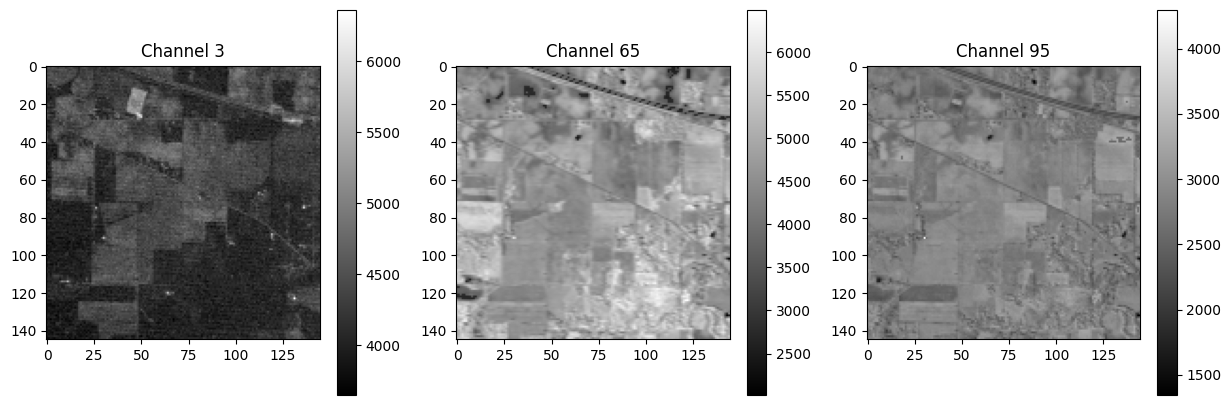

In [5]:
import matplotlib.pyplot as plt

# 2β. Plot the 3rd, 65th, and 95th channel of the image

plt.figure(figsize=(15, 5))

# Plotting the 3rd channel
plt.subplot(1, 3, 1)
plt.imshow(image[:, :, 2], cmap='gray')
plt.title('Channel 3')
plt.colorbar()

# Plotting the 65th channel
plt.subplot(1, 3, 2)
plt.imshow(image[:, :, 64], cmap='gray')
plt.title('Channel 65')
plt.colorbar()

# Plotting the 95th channel
plt.subplot(1, 3, 3)
plt.imshow(image[:, :, 94], cmap='gray')
plt.title('Channel 95')
plt.colorbar()

plt.show()

2γ. Υπολογίστε τον αριθμό των διαφορετικών κατηγοριών καλλιέργειας/κλάσης στις επισημειώσεις

In [6]:
# 2γ. Calculate the number of different cultivation classes in the annotations

unique_classes = np.unique(ground_truth_annotations)
num_classes = len(unique_classes) - 1  # Subtracting 1 to exclude the 'Undefined' class
print(f"Number of different cultivation classes: {num_classes}")

Number of different cultivation classes: 16


2δ. Σχεδιάστε με χρήση της matplotlib τις επισημειώσεις σε μορφή εικόνας. Προσθέστε επιπλέον επεξηγηματική λεζάντα με χρήση της βιβλιοθήκης κάθε επισημείωσης (χρησιμοποιήστε τη λίστα `classes` που σας δόθηκε προηγουμένως).

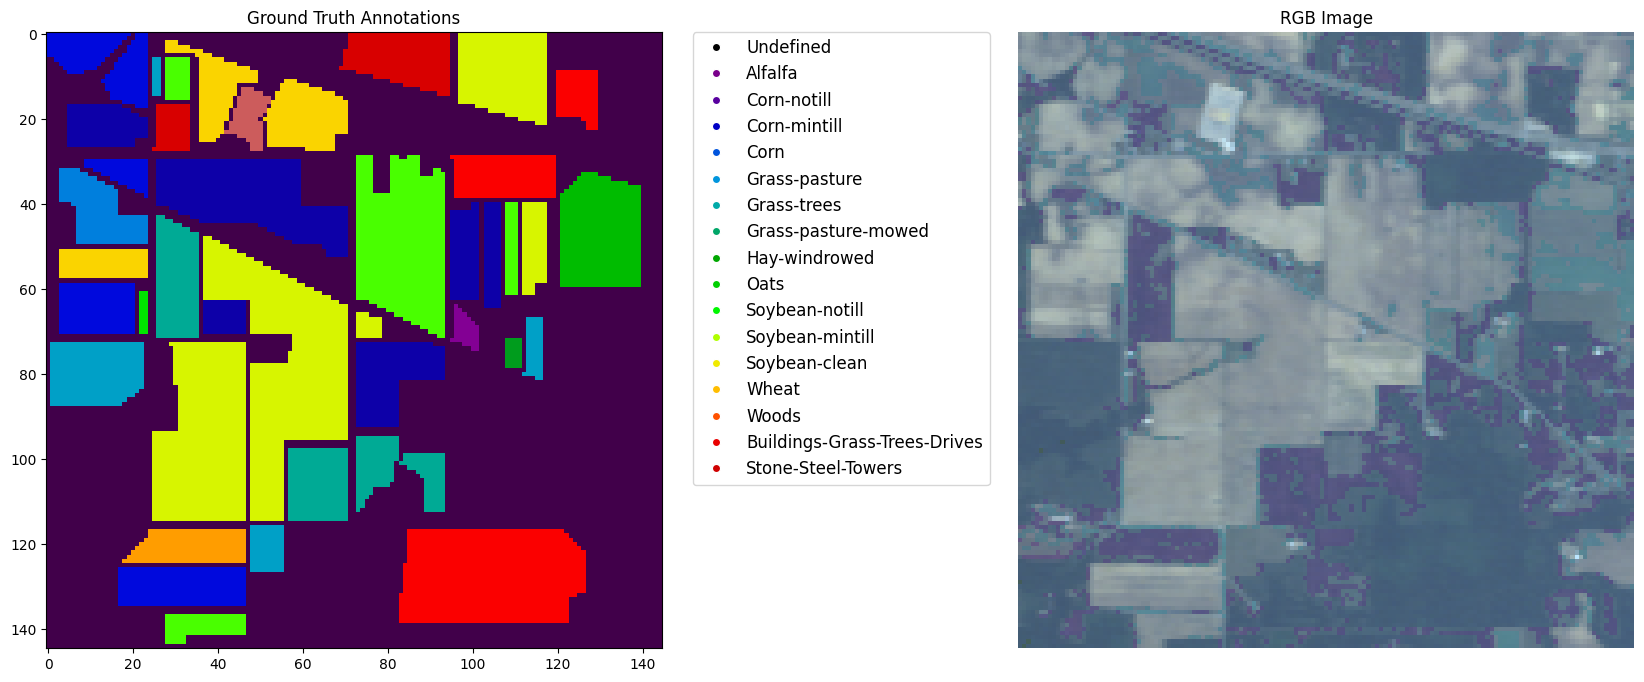

In [7]:
import matplotlib.pyplot as plt

# 2δ. Plot the annotations as an image using matplotlib. Add a legend for each annotation.


plt.figure(figsize=(23, 8))  # plotting subplots gia sigkrisi

# First subplot for the ground truth annotations
ax1 = plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
cax = ax1.imshow(ground_truth_annotations, cmap='nipy_spectral')
plt.title("Ground Truth Annotations")

# Set the clim here before creating the colorbar
cax.set_clim(-0.5, len(classes) - 0.5)
 

# Creating a legend with smaller class labels
legend_labels = {i: classes[i] for i in unique_classes}
patches = [plt.Line2D([0], [0], marker='o', color='w', label=label,
                      markerfacecolor=plt.cm.nipy_spectral(i/len(classes))) for i, label in legend_labels.items()]
ax1.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize='large')

# Second subplot for the RGB image
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
plt.imshow(RGB_image)
plt.axis('off')  # Remove the axis labels
plt.title("RGB Image")

# Show the plots
plt.show()


2ε. Υπολογίστε πόσα pixels της εικόνας αντιστοιχούν σε κάθε τύπο καλλιέργειας

In [8]:
# 2ε. Calculate how many pixels of the image correspond to each type of cultivation

pixel_counts = {classes[i]: np.sum(ground_truth_annotations == i) for i in unique_classes}

print("Pixel count per cultivation type:")
for cultivation_type, count in pixel_counts.items():
    print(f"{cultivation_type}: {count}")

Pixel count per cultivation type:
Undefined: 10776
Alfalfa: 46
Corn-notill: 1428
Corn-mintill: 830
Corn: 237
Grass-pasture: 483
Grass-trees: 730
Grass-pasture-mowed: 28
Hay-windrowed: 478
Oats: 20
Soybean-notill: 972
Soybean-mintill: 2455
Soybean-clean: 593
Wheat: 205
Woods: 1265
Buildings-Grass-Trees-Drives: 386
Stone-Steel-Towers: 93


### 3. Εύρεση φασματικών υπογραφών

3.α. Μετατρέψτε την υπερφασματική εικόνα και τις επισημειώσεις σε μορφή κατάλληλη για περαιτέρω επεξεργασία. Η εικόνα θα πρέπει να μετατραπεί σε πίνακα N x Κ, όπου Ν είναι ο αριθμός των pixels και K ο αριθμός των καναλιών. Οι επισημειώσεις αντίστοιχα θα πρέπει να μετατραπούν σε διάνυσμα μήκους Ν. Στη συνέχεια, αφαιρέστε όσα δεδομένα είναι επισημειωμένα ως `Undefined`.

💡 Χρησιμοποιήστε την `numpy reshape`

In [9]:
# Correct reshaping of the hyperspectral image
height, width, K = image.shape
N = height * width
reshaped_image = image.reshape((N, K))

# Flatten the ground truth annotations to create a vector of length N
reshaped_annotations = ground_truth_annotations.flatten()

# Remove the data labeled as 'Undefined' (class 0)
defined_indices = reshaped_annotations != 0  # Indices of pixels that are not 'Undefined'
filtered_image = reshaped_image[defined_indices]
filtered_annotations = reshaped_annotations[defined_indices]

# Printing the shapes of the reshaped and filtered data for confirmation
print("Shape of reshaped image:", filtered_image.shape)
print("Shape of reshaped annotations:", filtered_annotations.shape)


Shape of reshaped image: (10249, 200)
Shape of reshaped annotations: (10249,)


3.β. Επιλέξτε ένα τυχαίο pixel της εικόνας από κάθε κατηγορία, είτε με προγραμματιστικό τρόπο, είτε χειροκίνητα.

In [10]:
import random

# Dictionary to store a random pixel index and its mean value for each category
random_pixel_info = {}

for category in range(1, len(classes)):  # Starting from 1 to exclude the 'Undefined' class
    # Find the indices of all pixels that belong to the current category
    category_indices = np.where(filtered_annotations == category)[0]

    # Choose a random index from these indices
    if len(category_indices) > 0:
        random_index = random.choice(category_indices)
        random_pixel = filtered_image[random_index]
        random_pixel_mean = np.mean(random_pixel)
        random_pixel_info[classes[category]] = (random_index, random_pixel_mean)

# Display the summary information for the random pixels for each category
for category, info in random_pixel_info.items():
    print(f"Random pixel from {category}: Index {info[0]}, Mean Spectral Value {info[1]:.2f}")


Random pixel from Alfalfa: Index 5934, Mean Spectral Value 2730.40
Random pixel from Corn-notill: Index 3554, Mean Spectral Value 3054.39
Random pixel from Corn-mintill: Index 9938, Mean Spectral Value 2719.39
Random pixel from Corn: Index 2464, Mean Spectral Value 2506.22
Random pixel from Grass-pasture: Index 7088, Mean Spectral Value 2699.78
Random pixel from Grass-trees: Index 4370, Mean Spectral Value 2515.52
Random pixel from Grass-pasture-mowed: Index 6253, Mean Spectral Value 2681.24
Random pixel from Hay-windrowed: Index 4224, Mean Spectral Value 2603.44
Random pixel from Oats: Index 5790, Mean Spectral Value 2561.02
Random pixel from Soybean-notill: Index 3243, Mean Spectral Value 2784.25
Random pixel from Soybean-mintill: Index 4478, Mean Spectral Value 2630.93
Random pixel from Soybean-clean: Index 778, Mean Spectral Value 2464.20
Random pixel from Wheat: Index 9128, Mean Spectral Value 2478.49
Random pixel from Woods: Index 1995, Mean Spectral Value 2431.87
Random pixel fr

3.γ. Γράψτε κώδικα για να σχεδιάσετε την υπερφασματική υπογραφή των επιλεγμένων pixels.

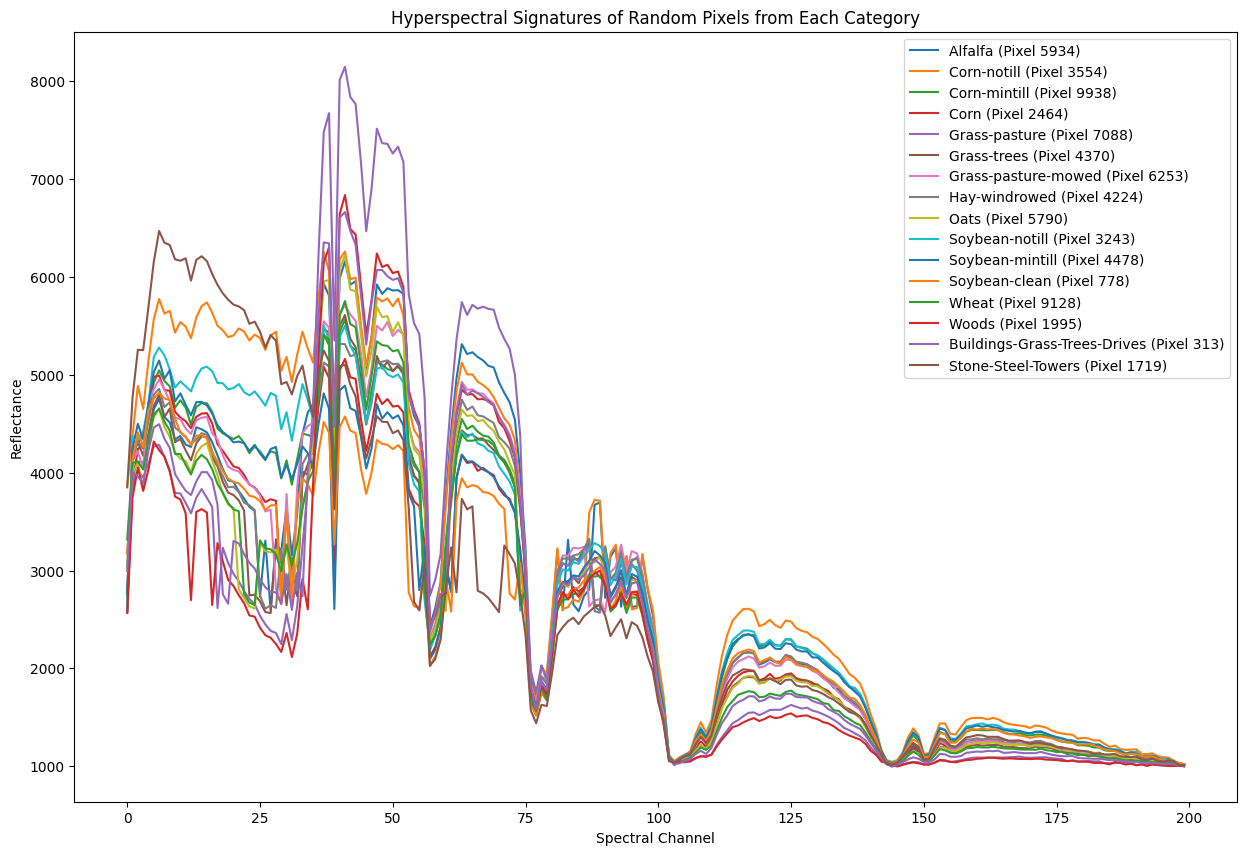

In [11]:
# Plotting the hyperspectral signatures of the selected random pixels
plt.figure(figsize=(15, 10))

for category, (index, _) in random_pixel_info.items():
    # Retrieve the spectral values of the random pixel
    pixel_values = filtered_image[index]

    # Plotting the spectral signature
    plt.plot(pixel_values, label=f"{category} (Pixel {index})")

plt.title('Hyperspectral Signatures of Random Pixels from Each Category')
plt.xlabel('Spectral Channel')
plt.ylabel('Reflectance')
plt.legend()
plt.show()


3.δ. Επαναλάβετε την προηγούμενη διαδικασία άλλες δύο φορές, σχεδιάζοντας τα νέα διαγράμματα.

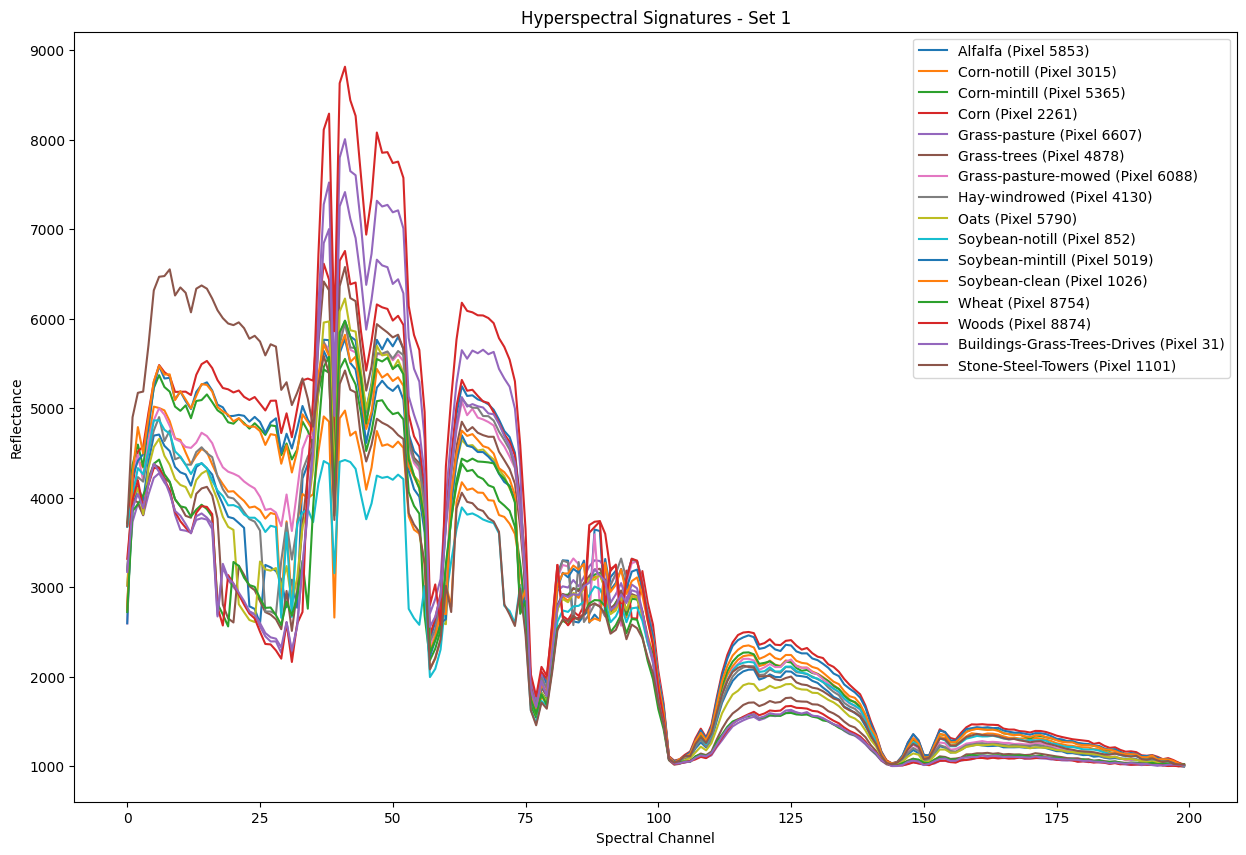

In [12]:
# Generate a new set of random pixels
random_pixel_info_set1 = {}

for category in range(1, len(classes)):  # Excluding 'Undefined'
    category_indices = np.where(filtered_annotations == category)[0]
    if len(category_indices) > 0:
        random_index = random.choice(category_indices)
        random_pixel_info_set1[classes[category]] = random_index

# Plotting
plt.figure(figsize=(15, 10))
for category, index in random_pixel_info_set1.items():
    pixel_values = filtered_image[index]
    plt.plot(pixel_values, label=f"{category} (Pixel {index})")

plt.title('Hyperspectral Signatures - Set 1')
plt.xlabel('Spectral Channel')
plt.ylabel('Reflectance')
plt.legend()
plt.show()


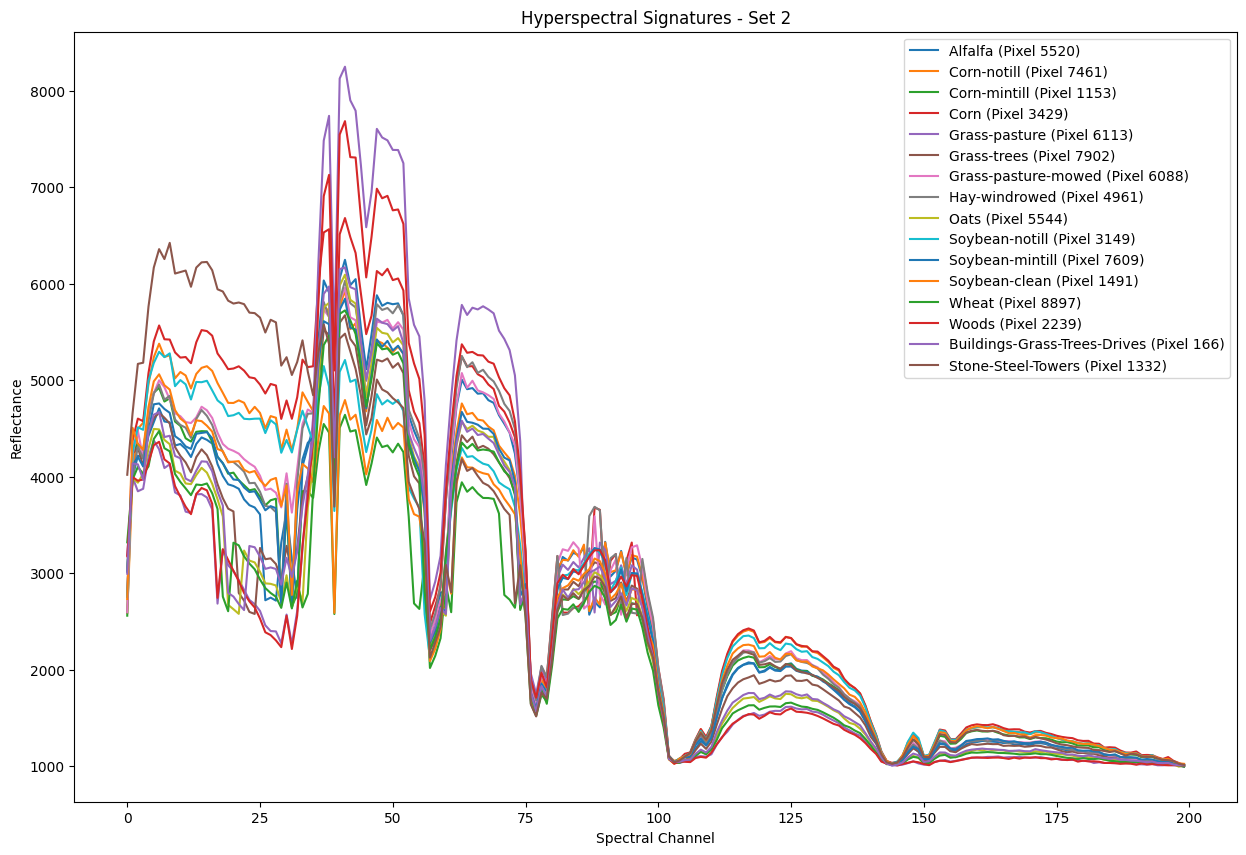

In [13]:
# Generate a second new set of random pixels
random_pixel_info_set2 = {}

for category in range(1, len(classes)):  # Excluding 'Undefined'
    category_indices = np.where(filtered_annotations == category)[0]
    if len(category_indices) > 0:
        random_index = random.choice(category_indices)
        random_pixel_info_set2[classes[category]] = random_index

# Plotting
plt.figure(figsize=(15, 10))
for category, index in random_pixel_info_set2.items():
    pixel_values = filtered_image[index]
    plt.plot(pixel_values, label=f"{category} (Pixel {index})")

plt.title('Hyperspectral Signatures - Set 2')
plt.xlabel('Spectral Channel')
plt.ylabel('Reflectance')
plt.legend()
plt.show()


3.ε. Σημειώστε τις παρατηρήσεις σας και τα συμπεράσματα σας. Προσπαθήστε να απαντήσετε στις ακόλουθες ερωτήσεις:
    
* Με βάση τα προηγούμενα διαγράμματα θεωρείτε ότι κάποιες καλλιέργειες είναι πιο εύκολα διαχωρίσιμες από άλλες με βάση τη φασματική υπογραφή τους;
* Θεωρείτε ότι όλα τα κανάλια παρέχουν χρήσιμη πληροφορία για το διαχωρισμό;


Είναι ορισμένες καλλιέργειες πιο εύκολα διαχωρίσιμες από άλλες με βάση τη φασματική υπογραφή τους;

Εάν τα διαγράμματα δείχνουν σαφείς διακρίσεις στις φασματικές υπογραφές για ορισμένες καλλιέργειες (π.χ. μοναδικές κορυφές ή μοτίβα που δεν μοιράζονται με άλλες), αυτό υποδηλώνει ότι αυτές οι καλλιέργειες είναι πιο εύκολα διαχωρίσιμες.
Οι επικαλυπτόμενες καμπύλες υποδηλώνουν ομοιότητα στις φασματικές ιδιότητες, γεγονός που δειχνει μεγαλύτερη δυσκολία στη διάκριση των συγκεκριμένων κατηγοριών.


Παρέχουν όλα τα κανάλια χρήσιμες πληροφορίες για τη διαφοροποίηση;

Εάν ορισμένα κανάλια παρουσιάζουν σταθερά μεγαλύτερη διακύμανση μεταξύ των κατηγοριών, είναι πιθανό να είναι πιο χρησιμα.
Τα κανάλια στα οποία οι περισσότερες καμπύλες επικαλύπτονται ή παραμένουν επίπεδες μπορεί να μην συμβάλλουν σημαντικά στη διαφοροποίηση.
Η χρησιμότητα των καναλιών μπορεί επίσης να εξαρτάται από τις συγκεκριμένες κατηγορίες που συγκρίνονται.


3.στ. Σχεδιάστε ένα heatmap, που να δείχνει τη συσχέτιση μεταξύ των διαφορετικών καναλιών

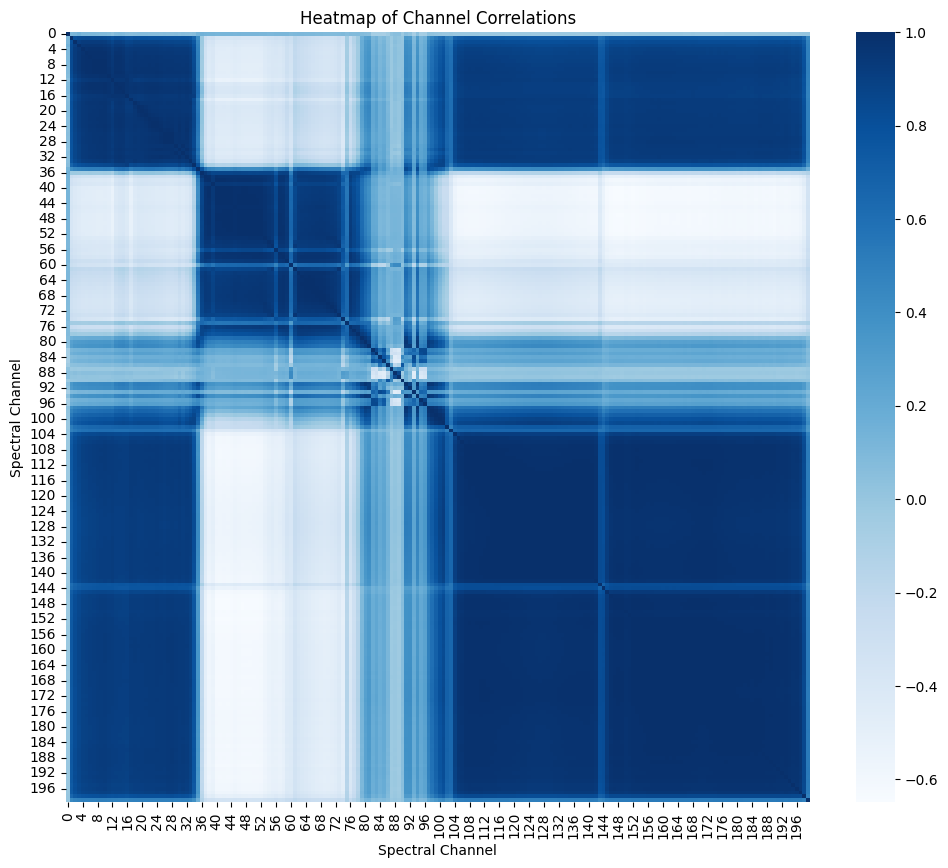

In [14]:
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = np.corrcoef(filtered_image.T)  # Transpose to get channels as features

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='Blues', annot=False)
plt.title('Heatmap of Channel Correlations')
plt.xlabel('Spectral Channel')
plt.ylabel('Spectral Channel')
plt.show()


### 4. Συσταδοποίηση με χρήση του αλγορίθμου k-Means

 4.α. Εφαρμόστε τον αλγόριθμο k-Means (sklearn.cluster) στα δεδομένα (εφόσον κάνατε την προεπεξεργασία του Βήματος 3). Χρησιμοποιήστε την τιμή `n_cluster=16`.

In [15]:
from sklearn.cluster import KMeans

# Number of clusters
n_clusters = 16

# Initialize the KMeans algorithm
kmeans = KMeans(n_clusters=n_clusters, random_state=0)

# Fit the model to the data
kmeans.fit(filtered_image)

# Get the cluster assignments for each data point
cluster_assignments = kmeans.labels_

# Print the shape of the cluster assignments to confirm
print("Shape of cluster assignments:", cluster_assignments.shape)

C:\Users\Chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Shape of cluster assignments: (10249,)


4.β. Υπολογίστε τις ακόλουθες μετρικές των προβλέψεων του αλγορίθμου

* Accuracy Score
* Rand Score
* Silhouette Score

Σημειώστε ότι για τη συνάρτηση rand_score μπορείτε να δώσετε σαν είσοδο τα αρχικά labels που σας δόθηκαν μαζί με τα predicted. Για τον υπολογισμό όμως του accuracy, θα πρέπει να αντιστοιχίσουμε τα διαφορετικά ID των clusters στην έξοδο του KMeans, με τις κατηγορίες της αρχικής επισημείωσης. Για την μετατροπή αυτή μπορείτε να χρησιμοποιήσετε την ακόλουθη συνάρτηση που σας δίνεται `translate_predicted_labels`.

In [16]:
from sklearn.metrics import confusion_matrix, rand_score, silhouette_score
from munkres import Munkres

def make_cost_matrix(c1, c2):
    uc1 = np.unique(c1)
    uc2 = np.unique(c2)
    l1 = uc1.size
    l2 = uc2.size

    m = np.zeros([l1, l2])
    for i in range(l1):
        it_i = np.nonzero(c1 == uc1[i])[0]
        for j in range(l2):
            it_j = np.nonzero(c2 == uc2[j])[0]
            m_ij = np.intersect1d(it_j, it_i)
            m[i,j] = -m_ij.size
    return m


def translate_clustering(clt, mapper):
    return np.array([ mapper[i] for i in clt ])

def accuracy(cm):
    """computes accuracy from confusion matrix"""
    return np.trace(cm, dtype=float) / np.sum(cm)


def translate_predicted_labels(predicted_y, y):
    cost_matrix = make_cost_matrix(predicted_y, y)
    m = Munkres()
    indexes = m.compute(cost_matrix)
    mapper = { old: new for (old, new) in indexes }

    for old, new in mapper.items():
        print("map: %s --> %s" %(old, new))

    translated_predicted_y = translate_clustering(predicted_y, mapper)
    return translated_predicted_y

# Translate the predicted labels
translated_predicted_y = translate_predicted_labels(cluster_assignments, filtered_annotations)

# Calculate the metrics
# Accuracy
cm = confusion_matrix(filtered_annotations, translated_predicted_y)
acc = accuracy(cm)
print("Accuracy Score:", acc)

# Rand Score
rand_sc = rand_score(filtered_annotations, cluster_assignments)
print("Rand Score:", rand_sc)

# Silhouette Score
silhouette_sc = silhouette_score(filtered_image, cluster_assignments)
print("Silhouette Score:", silhouette_sc)

map: 0 --> 2
map: 1 --> 14
map: 2 --> 9
map: 3 --> 13
map: 4 --> 1
map: 5 --> 4
map: 6 --> 0
map: 7 --> 3
map: 8 --> 12
map: 9 --> 15
map: 10 --> 5
map: 11 --> 11
map: 12 --> 10
map: 13 --> 7
map: 14 --> 8
map: 15 --> 6
Accuracy Score: 0.11474290174651186
Rand Score: 0.8510344376622414
Silhouette Score: 0.28349589322185115


4.δ. Σχεδιάστε το confusion matrix (χρησιμοποιήστε τα αντιστοιχισμένα predicted labels).

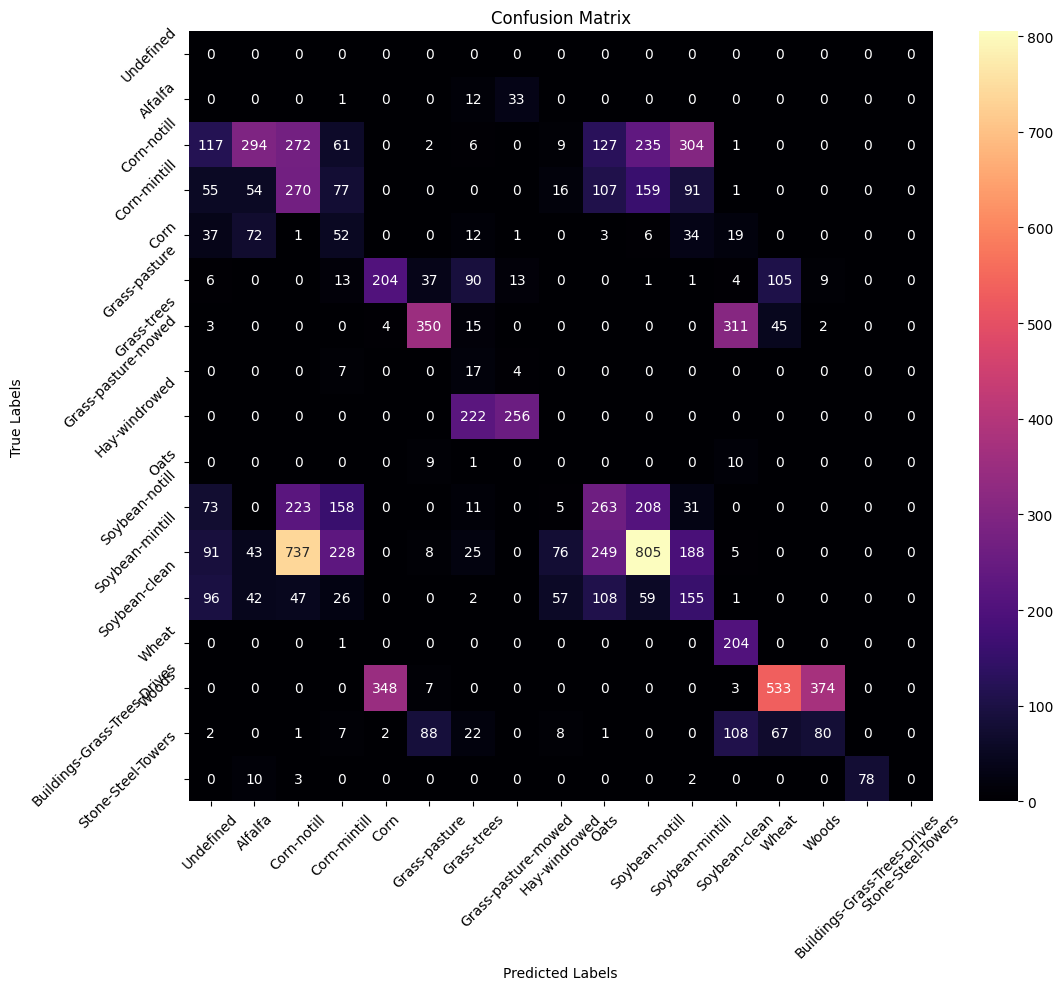

In [17]:


# Plotting the confusion matrix with class names
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='magma', xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(rotation=45)  # Optional: Rotate x labels for better readability
plt.yticks(rotation=45)  # Optional: Rotate y labels for better readability
plt.show()

4.ε. Όπως στο 2.δ. σχεδιάστε με χρήση της matplotlib τα predicted labels σε μορφή εικόνας.

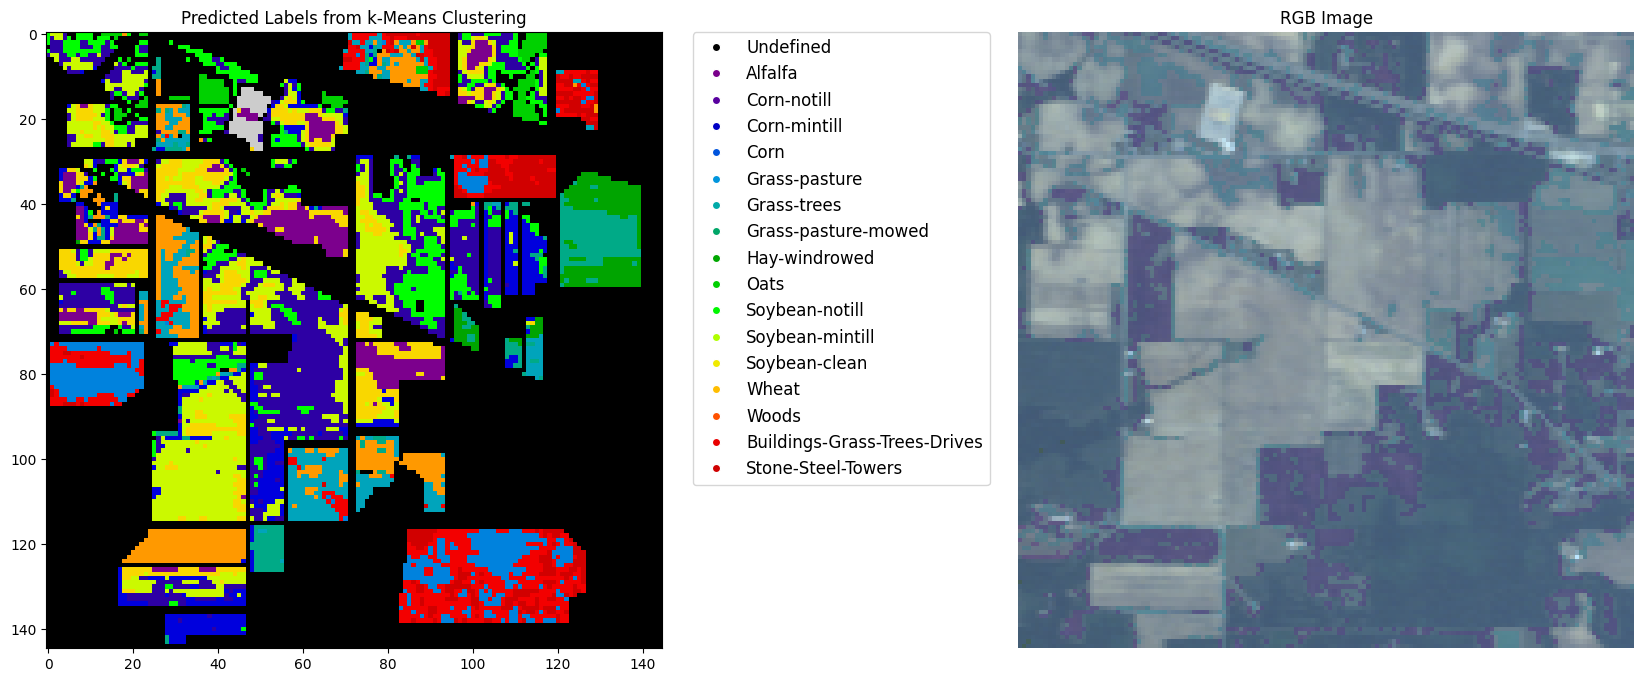

In [18]:
# Create an array to hold the complete set of predictions
complete_predictions = np.zeros_like(ground_truth_annotations)

# Insert the translated predictions into this array
defined_indices = ground_truth_annotations != 0
complete_predictions[defined_indices] = translated_predicted_y


# Start a new figure for the subplots
plt.figure(figsize=(23, 8))  # Adjust the overall figure size

# First subplot for the complete predicted labels
ax1 = plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
cax1 = ax1.imshow(complete_predictions, cmap='nipy_spectral')
plt.title("Predicted Labels from k-Means Clustering")

# Creating a legend with class labels for the first subplot
legend_labels = {i: classes[i] for i in unique_classes}
patches = [plt.Line2D([0], [0], marker='o', color='w', label=label,
                      markerfacecolor=plt.cm.nipy_spectral(i/len(classes))) for i, label in legend_labels.items()]
ax1.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize='large')


# Second subplot for the RGB image
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
plt.imshow(RGB_image)
plt.axis('off')  # Remove the axis labels
plt.title("RGB Image")

# Show the plots
plt.show()

### 5. Μείωση διαστατικότητας δεδομένων

5.α. Εφαρμόστε στα δεδομένα τη μέθοδο μείωσης διαστατικότητας PCA. Επιλέξτε `n_components=3`

In [19]:
from sklearn.decomposition import PCA

# Number of components for PCA
n_components = 3

# Initialize PCA with the specified number of components
pca = PCA(n_components=n_components)

# Fit and transform the data using PCA
pca_transformed_data = pca.fit_transform(filtered_image)

# Print the shape of the transformed data
print("Shape of PCA transformed data:", pca_transformed_data.shape)


Shape of PCA transformed data: (10249, 3)


5.β. Τι ποσοστό της διακύμανσης των δεδομένων διατηρείτε με `n_components=3` ?
Hint: sklearn.decomposition.PCA.explained_variance_ratio_

In [20]:
# Calculate the percentage of variance explained by the first three components
explained_variance_ratio = pca.explained_variance_ratio_
total_variance_explained = np.sum(explained_variance_ratio) * 100  # Convert to percentage

print(f"Percentage of Variance Explained by the First 3 Components: {total_variance_explained:.2f}%")


Percentage of Variance Explained by the First 3 Components: 94.20%


### 6. Συνδυασμός μείωσης διαστατικότητας και k-Means

6.α. Εφαρμόστε τον αλγόριθμο kmeans στα δεδομένα μειωμένης διαστατικότητας `n_components=3`, και υπολογίστε εκ νέου τις μετρικές του Βήματος 4.γ.

In [21]:
# Apply k-Means to the PCA-reduced data
kmeans_pca = KMeans(n_clusters=n_clusters, random_state=0)
kmeans_pca.fit(pca_transformed_data)

# Get the new cluster assignments
cluster_assignments_pca = kmeans_pca.labels_

# Translate the predicted labels to align with the ground truth categories
translated_predicted_y_pca = translate_predicted_labels(cluster_assignments_pca, filtered_annotations)

# Calculate the metrics for the new clustering results
# Accuracy
cm_pca = confusion_matrix(filtered_annotations, translated_predicted_y_pca)
acc_pca = accuracy(cm_pca)
print("Accuracy Score (PCA):", acc_pca)

# Rand Score
rand_sc_pca = rand_score(filtered_annotations, cluster_assignments_pca)
print("Rand Score (PCA):", rand_sc_pca)

# Silhouette Score
silhouette_sc_pca = silhouette_score(pca_transformed_data, cluster_assignments_pca)
print("Silhouette Score (PCA):", silhouette_sc_pca)


map: 0 --> 6
map: 1 --> 14
map: 2 --> 0
map: 3 --> 8
map: 4 --> 3
map: 5 --> 4
map: 6 --> 7
map: 7 --> 5
map: 8 --> 9
map: 9 --> 1
map: 10 --> 11
map: 11 --> 12
map: 12 --> 13
map: 13 --> 2
map: 14 --> 10
map: 15 --> 15
Accuracy Score (PCA): 0.11796272807103132
Rand Score (PCA): 0.8515978672811246


C:\Users\Chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score (PCA): 0.3709113898425499


6.β. Δοκιμάστε διαφορετικές τιμές για το `n_components` (από 1 έως 10) και για κάθε μία από αυτές τις τιμές τρέξτε εκ νέου τον k-Μeans, υπολογίζοντας τα τελικά scores. Για κάθε μετρική, φτιάξτε ένα διάγραμμα που στον άξονα των Χ θα έχει τον αριθμό `n_components` και στον άξονα των Υ, την τιμή της μετρικής. Τι συμπεράσματα βγάζετε;

In [22]:
n_components_range = range(1, 11)
accuracy_scores = []
rand_scores = []
silhouette_scores = []

for n_components in n_components_range:
    # Apply PCA
    pca = PCA(n_components=n_components)
    pca_transformed_data = pca.fit_transform(filtered_image)

    # Apply k-Means to the PCA-reduced data
    kmeans_pca = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans_pca.fit(pca_transformed_data)
    cluster_assignments_pca = kmeans_pca.labels_

    # Translate predicted labels
    translated_predicted_y_pca = translate_predicted_labels(cluster_assignments_pca, filtered_annotations)

    # Calculate metrics
    cm_pca = confusion_matrix(filtered_annotations, translated_predicted_y_pca)
    accuracy_scores.append(accuracy(cm_pca))
    rand_scores.append(rand_score(filtered_annotations, cluster_assignments_pca))
    silhouette_scores.append(silhouette_score(pca_transformed_data, cluster_assignments_pca))


map: 0 --> 10
map: 1 --> 14
map: 2 --> 7
map: 3 --> 12
map: 4 --> 11
map: 5 --> 13
map: 6 --> 1
map: 7 --> 15
map: 8 --> 3
map: 9 --> 2
map: 10 --> 6
map: 11 --> 4
map: 12 --> 0
map: 13 --> 5
map: 14 --> 9
map: 15 --> 8


C:\Users\Chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


map: 0 --> 14
map: 1 --> 6
map: 2 --> 10
map: 3 --> 4
map: 4 --> 11
map: 5 --> 7
map: 6 --> 2
map: 7 --> 13
map: 8 --> 12
map: 9 --> 0
map: 10 --> 1
map: 11 --> 8
map: 12 --> 9
map: 13 --> 5
map: 14 --> 15
map: 15 --> 3


C:\Users\Chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


map: 0 --> 6
map: 1 --> 14
map: 2 --> 0
map: 3 --> 8
map: 4 --> 3
map: 5 --> 4
map: 6 --> 7
map: 7 --> 5
map: 8 --> 9
map: 9 --> 1
map: 10 --> 11
map: 11 --> 12
map: 12 --> 13
map: 13 --> 2
map: 14 --> 10
map: 15 --> 15


C:\Users\Chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


map: 0 --> 5
map: 1 --> 2
map: 2 --> 10
map: 3 --> 0
map: 4 --> 4
map: 5 --> 6
map: 6 --> 1
map: 7 --> 14
map: 8 --> 9
map: 9 --> 8
map: 10 --> 13
map: 11 --> 7
map: 12 --> 15
map: 13 --> 3
map: 14 --> 11
map: 15 --> 12


C:\Users\Chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


map: 0 --> 3
map: 1 --> 5
map: 2 --> 10
map: 3 --> 6
map: 4 --> 4
map: 5 --> 1
map: 6 --> 12
map: 7 --> 9
map: 8 --> 0
map: 9 --> 13
map: 10 --> 11
map: 11 --> 14
map: 12 --> 7
map: 13 --> 15
map: 14 --> 8
map: 15 --> 2


C:\Users\Chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


map: 0 --> 2
map: 1 --> 13
map: 2 --> 11
map: 3 --> 7
map: 4 --> 6
map: 5 --> 4
map: 6 --> 10
map: 7 --> 0
map: 8 --> 8
map: 9 --> 5
map: 10 --> 9
map: 11 --> 1
map: 12 --> 15
map: 13 --> 3
map: 14 --> 12
map: 15 --> 14


C:\Users\Chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


map: 0 --> 3
map: 1 --> 14
map: 2 --> 11
map: 3 --> 0
map: 4 --> 10
map: 5 --> 4
map: 6 --> 7
map: 7 --> 8
map: 8 --> 9
map: 9 --> 5
map: 10 --> 13
map: 11 --> 1
map: 12 --> 15
map: 13 --> 6
map: 14 --> 2
map: 15 --> 12


C:\Users\Chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


map: 0 --> 11
map: 1 --> 13
map: 2 --> 9
map: 3 --> 12
map: 4 --> 10
map: 5 --> 2
map: 6 --> 1
map: 7 --> 4
map: 8 --> 6
map: 9 --> 0
map: 10 --> 14
map: 11 --> 8
map: 12 --> 3
map: 13 --> 15
map: 14 --> 5
map: 15 --> 7


C:\Users\Chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


map: 0 --> 2
map: 1 --> 14
map: 2 --> 7
map: 3 --> 8
map: 4 --> 4
map: 5 --> 13
map: 6 --> 11
map: 7 --> 12
map: 8 --> 9
map: 9 --> 0
map: 10 --> 15
map: 11 --> 6
map: 12 --> 5
map: 13 --> 3
map: 14 --> 1
map: 15 --> 10


C:\Users\Chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


map: 0 --> 2
map: 1 --> 5
map: 2 --> 1
map: 3 --> 0
map: 4 --> 4
map: 5 --> 6
map: 6 --> 11
map: 7 --> 14
map: 8 --> 9
map: 9 --> 3
map: 10 --> 12
map: 11 --> 10
map: 12 --> 15
map: 13 --> 8
map: 14 --> 13
map: 15 --> 7


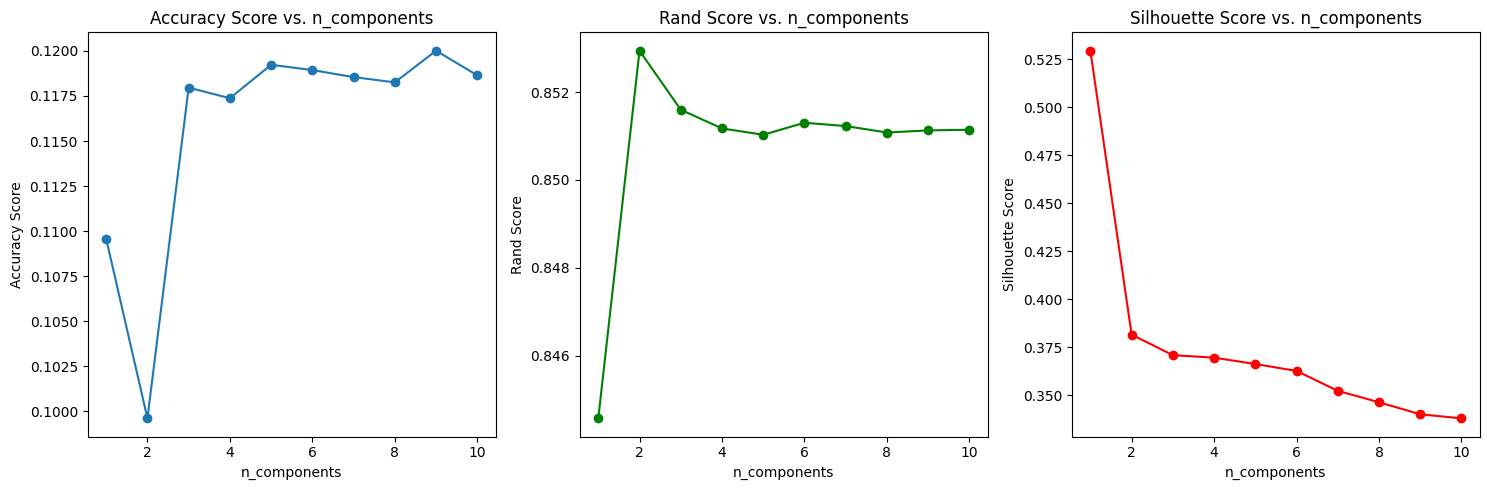

In [23]:
# Plotting Accuracy, Rand Score, and Silhouette Score
plt.figure(figsize=(15, 5))

# Accuracy Score Plot
plt.subplot(1, 3, 1)
plt.plot(n_components_range, accuracy_scores, marker='o')
plt.title('Accuracy Score vs. n_components')
plt.xlabel('n_components')
plt.ylabel('Accuracy Score')

# Rand Score Plot
plt.subplot(1, 3, 2)
plt.plot(n_components_range, rand_scores, marker='o', color='green')
plt.title('Rand Score vs. n_components')
plt.xlabel('n_components')
plt.ylabel('Rand Score')

# Silhouette Score Plot
plt.subplot(1, 3, 3)
plt.plot(n_components_range, silhouette_scores, marker='o', color='red')
plt.title('Silhouette Score vs. n_components')
plt.xlabel('n_components')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()
